In [7]:
# Import the dependencies
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from citipy import citipy

In [8]:
# Create a set of random latitude and longtitude combinations 
lats = np.random.uniform(low =-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [9]:
# Add the latitudes and longtitudes to a list 
coordinates = list(lat_lngs)


In [10]:
# Create a list for holding the cities. 
cities = []
# Identify the nearest city for each latitude and longtitude combination 
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name 
    
    #If the city is unique, then we will add it to the cities list 
    if city not in cities: 
        cities.append(city)
# Print the city count to confirm sufficient count 
len(cities)

585

In [11]:
cities

['busselton',
 'komsomolskoye',
 'rikitea',
 'barrow',
 'sept-iles',
 'punta arenas',
 'butaritari',
 'jamestown',
 'shuyskoye',
 'carnarvon',
 'luderitz',
 'port alfred',
 'uppsala',
 'dikson',
 'boyolangu',
 'havre-saint-pierre',
 'moranbah',
 'samusu',
 'caernarfon',
 'dukat',
 'mataura',
 'broome',
 'mumford',
 'ballyhaunis',
 'hilo',
 'pevek',
 'popondetta',
 'tuktoyaktuk',
 'ushuaia',
 'arraial do cabo',
 'kununurra',
 'kavieng',
 'taolanaro',
 'antofagasta',
 'hermanus',
 'atuona',
 'puerto ayora',
 'castro',
 'masty',
 'constitucion',
 'olinda',
 'provideniya',
 'tiksi',
 'alofi',
 'karasjok',
 'nikolskoye',
 'juifang',
 'upernavik',
 'russell',
 'akcaabat',
 'thompson',
 'yellowknife',
 'avarua',
 'ahipara',
 'goderich',
 'rosarito',
 'florianopolis',
 'gubkinskiy',
 'cabo san lucas',
 'kaeo',
 'kodiak',
 'tsihombe',
 'attawapiskat',
 'mahebourg',
 'katsuura',
 'mar del plata',
 'yaan',
 'illoqqortoormiut',
 'ponta do sol',
 'port blair',
 'xinzhi',
 'opuwo',
 'tupik',
 'santa

In [12]:
# Import the requests library
import requests 
#Import the API key 
from config import weather_api_key
#Import the datetime module from the datetime library 
from datetime import datetime 

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=af276efb8e09fe8a2c858c894a0771b8


In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | busselton
Processing Record 2 of Set 12 | komsomolskoye
Processing Record 3 of Set 12 | rikitea
Processing Record 4 of Set 12 | barrow
Processing Record 5 of Set 12 | sept-iles
Processing Record 6 of Set 12 | punta arenas
Processing Record 7 of Set 12 | butaritari
Processing Record 8 of Set 12 | jamestown
Processing Record 9 of Set 12 | shuyskoye
Processing Record 10 of Set 12 | carnarvon
Processing Record 11 of Set 12 | luderitz
Processing Record 12 of Set 12 | port alfred
Processing Record 13 of Set 12 | uppsala
Processing Record 14 of Set 12 | dikson
Processing Record 15 of Set 12 | boyolangu
Processing Record 16 of Set 12 | havre-saint-pierre
Processing Record 17 of Set 12 | moranbah
Processing Record 18 of Set 12 | samusu
City not found. Skipping...
Processing Record 19 of Set 12 | caernarfon
Processing Record 20 of Set 12 | dukat
Processing Record 21 of Set 12 | mataura
Processing Record 2

Processing Record 32 of Set 15 | cayenne
Processing Record 33 of Set 15 | qaanaaq
Processing Record 34 of Set 15 | chokurdakh
Processing Record 35 of Set 15 | saleaula
City not found. Skipping...
Processing Record 36 of Set 15 | teya
Processing Record 37 of Set 15 | hofn
Processing Record 38 of Set 15 | tessalit
Processing Record 39 of Set 15 | deputatskiy
Processing Record 40 of Set 15 | east london
Processing Record 41 of Set 15 | traverse city
Processing Record 42 of Set 15 | san cristobal
Processing Record 43 of Set 15 | margate
Processing Record 44 of Set 15 | ambatondrazaka
Processing Record 45 of Set 15 | olafsvik
Processing Record 46 of Set 15 | aklavik
Processing Record 47 of Set 15 | kibala
Processing Record 48 of Set 15 | don sak
Processing Record 49 of Set 15 | baykit
Processing Record 50 of Set 15 | tsienyane
City not found. Skipping...
Processing Record 1 of Set 16 | moyale
Processing Record 2 of Set 16 | eskil
Processing Record 3 of Set 16 | lixourion
Processing Record 4

Processing Record 15 of Set 19 | bafoulabe
Processing Record 16 of Set 19 | miram shah
Processing Record 17 of Set 19 | khash
Processing Record 18 of Set 19 | gaoua
Processing Record 19 of Set 19 | evensk
Processing Record 20 of Set 19 | moanda
Processing Record 21 of Set 19 | lavrentiya
Processing Record 22 of Set 19 | sao sebastiao
Processing Record 23 of Set 19 | lerwick
Processing Record 24 of Set 19 | muzhi
Processing Record 25 of Set 19 | bubaque
Processing Record 26 of Set 19 | alekseyevka
Processing Record 27 of Set 19 | winburg
Processing Record 28 of Set 19 | yulara
Processing Record 29 of Set 19 | polewali
Processing Record 30 of Set 19 | podgorenskiy
Processing Record 31 of Set 19 | codrington
Processing Record 32 of Set 19 | shenjiamen
Processing Record 33 of Set 19 | sol-iletsk
Processing Record 34 of Set 19 | saskylakh
Processing Record 35 of Set 19 | senmonorom
City not found. Skipping...
Processing Record 36 of Set 19 | hay river
Processing Record 37 of Set 19 | kawalu

Processing Record 1 of Set 23 | sao paulo de olivenca
Processing Record 2 of Set 23 | prince rupert
Processing Record 3 of Set 23 | marcona
City not found. Skipping...
Processing Record 4 of Set 23 | novotalitsy
City not found. Skipping...
Processing Record 5 of Set 23 | inta
Processing Record 6 of Set 23 | college
Processing Record 7 of Set 23 | honningsvag
Processing Record 8 of Set 23 | khorramshahr
Processing Record 9 of Set 23 | kirakira
Processing Record 10 of Set 23 | havelock
Processing Record 11 of Set 23 | trenggalek
Processing Record 12 of Set 23 | mount darwin
Processing Record 13 of Set 23 | muros
Processing Record 14 of Set 23 | ust-nera
Processing Record 15 of Set 23 | duvan
Processing Record 16 of Set 23 | bonito
Processing Record 17 of Set 23 | sitka
Processing Record 18 of Set 23 | itagi
Processing Record 19 of Set 23 | clinton
Processing Record 20 of Set 23 | wanaka
Processing Record 21 of Set 23 | shelburne
Processing Record 22 of Set 23 | laibin
Processing Record 2

In [20]:
# Conver the array of dictionaries to a Pandas DataFrame 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,62.01,51,64,7.61,AU,2020-04-17 00:53:05
1,Komsomolskoye,55.26,47.55,39.00,88,99,14.50,RU,2020-04-17 00:53:06
2,Rikitea,-23.12,-134.97,76.69,74,24,11.25,PF,2020-04-17 00:53:06
3,Barrow,71.29,-156.79,15.80,78,90,10.29,US,2020-04-17 00:59:31
4,Sept-Iles,50.20,-66.38,30.99,39,75,10.29,CA,2020-04-17 00:59:31
5,Punta Arenas,-53.15,-70.92,50.00,87,75,8.05,CL,2020-04-17 00:55:35
6,Butaritari,3.07,172.79,84.20,75,100,15.12,KI,2020-04-17 00:59:31
7,Jamestown,42.10,-79.24,34.00,63,75,11.41,US,2020-04-17 00:56:54
8,Shuyskoye,59.37,41.03,32.72,90,99,6.26,RU,2020-04-17 00:59:32
9,Carnarvon,-24.87,113.63,78.80,54,63,9.17,AU,2020-04-17 00:53:08


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_reorder_df = city_data_df[new_column_order]

In [23]:
city_data_reorder_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-04-17 00:53:05,-33.65,115.33,62.01,51,64,7.61
1,Komsomolskoye,RU,2020-04-17 00:53:06,55.26,47.55,39.00,88,99,14.50
2,Rikitea,PF,2020-04-17 00:53:06,-23.12,-134.97,76.69,74,24,11.25
3,Barrow,US,2020-04-17 00:59:31,71.29,-156.79,15.80,78,90,10.29
4,Sept-Iles,CA,2020-04-17 00:59:31,50.20,-66.38,30.99,39,75,10.29
...,...,...,...,...,...,...,...,...,...
527,Alta Floresta,BR,2020-04-17 00:59:53,-9.88,-56.09,73.00,89,86,2.89
528,Bayir,TR,2020-04-17 01:03:00,37.27,28.22,51.80,87,0,3.36
529,Luneville,FR,2020-04-17 01:03:00,48.60,6.50,57.20,81,59,3.04
530,Pisco,PE,2020-04-17 00:59:34,-13.70,-76.22,75.20,64,4,18.34


In [24]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV 
city_data_reorder_df.to_csv(output_data_file, index_label = "City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_reorder_df["Lat"]
max_temps = city_data_reorder_df["Max Temp"]
humidity = city_data_reorder_df["Humidity"]
cloudiness = city_data_reorder_df["Cloudiness"]
wind_speed = city_data_reorder_df["Wind Speed"]

In [27]:
import matplotlib. pyplot as plt

In [31]:
# Import the time module 
import time 
# Get today's date in seconds 
today = time.time()
today

1587090776.005182

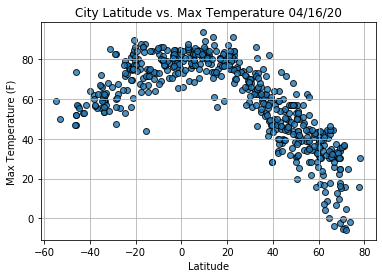

In [32]:
# Build the scatter plot for latitude vs max temp 
plt.scatter(lats, 
            max_temps,
            edgecolor = "black", linewidths=1, marker="o", 
            alpha =0.8, label="Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

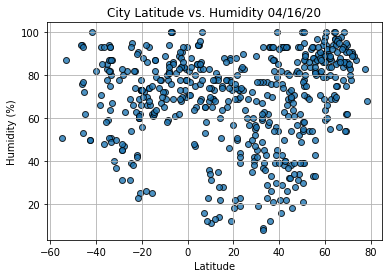

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

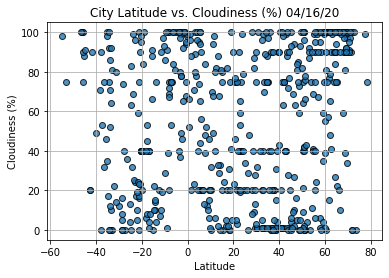

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

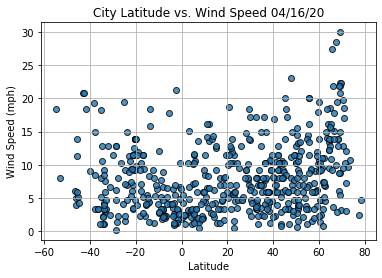

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()